#  Using Data Base in gstlearn

### Preamble
In this preamble, we load the **gstlearn** package.

In [1]:
import gstlearn as gl
import os
import pandas as pd
import urllib.request
import numpy as np

In [2]:
flagInternetAvailable=True


# Main Classes

Here is a (non-exhaustive) list of classes of objects in **gstlearn**:

-   Db, DbGrid: Numerical data base
-   DirParam, VarioParam and Vario: Experimental variograms
-   Model: Variogram model
-   Neigh: Neighborhood
-   Anam: Gaussian anamorphosis
-   Polygon: 2-D polygonal shapes
-   Rule: Lithotype rule for thresholds used for truncated plurigaussian models

# Importing External File

## Loading a CSV File

We start by downloading the file called `Scotland_Temperatures.csv` and we store it in the current working directory. In this example, the file (called `filecsv`) is provided as a *CSV* format file. We load it into a data frame (named `datcsv`) using the relevant R-command. Note that "MISS" keyword is used in this file to indicate a missing value. Such values will be replaced by NA.


In [3]:
filecsv = "Scotland_Temperatures.csv"

if flagInternetAvailable :
    url = os.path.join("https://soft.minesparis.psl.eu/gstlearn/data/Scotland/",filecsv)
    urllib.request.urlretrieve(url,filecsv)
    datcsv = pd.read_csv(filecsv,na_values="MISS")


We can check the contents of the data frame (by simply typing its name) and see that it contains four columns (respectively called `Longitude`, `Latitude`, `Elevation`, `January_temp`) and 236 rows (header line excluded).

In [4]:
datcsv

,Longitude,Latitude,Elevation,January_temp
0,372.1,658.9,255,1.7
1,303.5,665.9,125,2.0
2,218.4,597.9,8,4.6
3,245.0,955.0,90,NaN
4,326.8,691.2,32,3.1
...,...,...,...,...
231,273.2,564.6,47,2.8
232,333.9,730.1,30,2.6
233,185.0,655.0,115,NaN
234,259.8,587.9,119,2.1


The user can then create a database of the **gstlearn** package (*Db* class) directly from the previously imported data.frame.

In [5]:
# Create an empty Db
dat = gl.Db()
# And import all columns in one a loop using [] operator
for field in datcsv.columns:
    dat[field] = datcsv[field]
dat


Data Base Characteristics

Data Base Summary
-----------------
File is organized as a set of isolated points
Space dimension              = 0
Number of Columns            = 4
Total number of samples      = 236

Variables
---------
Column = 0 - Name = Longitude - Locator = NA
Column = 1 - Name = Latitude - Locator = NA
Column = 2 - Name = Elevation - Locator = NA
Column = 3 - Name = January_temp - Locator = NA


## Creating Db object directly from CSV file

These operations can be performed directly by reading the CSV file again and load it directly into a Db.

To do so, we start by creating `CSVformat` object using the `gl.CSVformat.create` function. This object is used to specify various properties of the file we want to load, namely the presence of a header line (through the argument `flagHeader`) and the way missing values are coded in the file (through the argument `naString`).

Then, the function `gl.Db.createFromCSV` allows to load directly the CSV file into a **gstlearn** data base.


In [6]:
csv = gl.CSVformat.create(flagHeader=True, naString = "MISS")
dat = gl.Db.createFromCSV(filecsv, csv=csv)
dat


Data Base Characteristics

Data Base Summary
-----------------
File is organized as a set of isolated points
Space dimension              = 0
Number of Columns            = 5
Total number of samples      = 236

Variables
---------
Column = 0 - Name = rank - Locator = NA
Column = 1 - Name = Longitude - Locator = NA
Column = 2 - Name = Latitude - Locator = NA
Column = 3 - Name = Elevation - Locator = NA
Column = 4 - Name = January_temp - Locator = NA

Note that a "rank" variable has been automatically added. The *rank* is always 1-based and must be distinguish from an *index* (0-based) when calling **gstlearn** functions (except for the `[]` operator, see below). The *rank* variable could be later useful for certain functions of the **gstlearn** package.

## Importing Db File from a "Neutral File"

A last solution is to import it directly from the set of demonstration files (provided together with the package and called `fileNF`) and stored in a specific format (Neutral file).

These *NF* (or neutral file) are currently used for serialization of the gstlearn objects. They will probably be replaced in the future by a facility backuping the whole workspace in one step.

Note that the contents of the Db is slightly different from the result obtained when reading from CSV. Essentially, some variables have a `Locator` field defined, some do not. This concept will be described later in this chapter and the difference can be ignored.


In [7]:
fileNF = "Scotland_Temperatures.NF"

if flagInternetAvailable :
    url = os.path.join("https://soft.minesparis.psl.eu/gstlearn/data/Scotland/",fileNF)
    urllib.request.urlretrieve(url,fileNF)
    dat = gl.Db.createFromNF(fileNF)

dat


Data Base Characteristics

Data Base Summary
-----------------
File is organized as a set of isolated points
Space dimension              = 2
Number of Columns            = 5
Total number of samples      = 236

Variables
---------
Column = 0 - Name = rank - Locator = NA
Column = 1 - Name = Longitude - Locator = x1
Column = 2 - Name = Latitude - Locator = x2
Column = 3 - Name = Elevation - Locator = NA
Column = 4 - Name = January_temp - Locator = z1

# Discovering Db

## The Db class

*Db* objects (as all objects that inherits from *AStringable*) have a method `display` allowing to print a summary of the content of the data base. The same occurs when typing the name of the variable at the end of a chunck (see above).


In [8]:
dat.display()


Data Base Characteristics

Data Base Summary
-----------------
File is organized as a set of isolated points
Space dimension              = 2
Number of Columns            = 5
Total number of samples      = 236

Variables
---------
Column = 0 - Name = rank - Locator = NA
Column = 1 - Name = Longitude - Locator = x1
Column = 2 - Name = Latitude - Locator = x2
Column = 3 - Name = Elevation - Locator = NA
Column = 4 - Name = January_temp - Locator = z1



As described in the "Data Base Summary" section, this *Db* object contains 5 fields (called *Columns*), and  contains 236 data points (called *samples*). Upon inspection, we see that the 4 variables of the csv file are present (Columns 1 through 4), alongside with an additional variable called `rank` (Column 0).


In addition, some interesting information tells you that this data base corresponds to a 2-D dimension one: this will be described later together with the use of the Locator information.

Remark: To get more information on the contents of the Db, we can provide the `display` method of a *Db* with a *DbStringFormat* object used to describe which information we would like to print. Such objects can be created using the function `gl.DbStringFormat.createFromFlags`. We refer the reader to the documentation of the *DbStringFormat* class for more details. The example below provides a way to add summary statistics about some variables of the *Db* to the *Db* summary.

In [9]:
dbfmt = gl.DbStringFormat.createFromFlags(flag_stats=True, names=["Elevation", "January_temp"])
dat.display(dbfmt)


Data Base Characteristics

Data Base Summary
-----------------
File is organized as a set of isolated points
Space dimension              = 2
Number of Columns            = 5
Total number of samples      = 236

Data Base Statistics
--------------------
4 - Name Elevation - Locator NA
 Nb of data          =        236
 Nb of active values =        236
 Minimum value       =      2.000
 Maximum value       =    800.000
 Mean value          =    146.441
 Standard Deviation  =    165.138
 Variance            =  27270.713
5 - Name January_temp - Locator z1
 Nb of data          =        236
 Nb of active values =        151
 Minimum value       =      0.600
 Maximum value       =      5.200
 Mean value          =      2.815
 Standard Deviation  =      1.010
 Variance            =      1.020

Variables
---------
Column = 0 - Name = rank - Locator = NA
Column = 1 - Name = Longitude - Locator = x1
Column = 2 - Name = Latitude - Locator = x2
Column = 3 - Name = Elevation - Locator = NA
Column =


Monovariate statistics are better displayed using a single function called *dbStatisticsMono*. This function waits for a vector of enumerators of type EStatOption as statistic operators. Such vector is created using a static function called *fromKeys* which is available in all enumerators classes (i.e. inherits from *AEnum*).

In [10]:
gl.dbStatisticsMono(dat,
                    names=["Elevation", "January_temp"],
                    opers=gl.EStatOption.fromKeys(["MEAN","MINI","MAXI"]))

                   Mean    Minimum    Maximum
   Elevation     87.974      3.000    387.000
January_temp      2.815      0.600      5.200


## Assessors for Db class

We can also consider the data base as a data frame and use the `[ ]` assessors. For instance, the full content of a `Db` can be displayed as a data.frame as follows. 


In [11]:
dat[:]

array([[  1. , 372.1, 658.9, 255. ,   1.7],
       [  2. , 303.5, 665.9, 125. ,   2. ],
       [  3. , 218.4, 597.9,   8. ,   4.6],
       ...,
       [234. , 185. , 655. , 115. ,   nan],
       [235. , 259.8, 587.9, 119. ,   2.1],
       [236. , 260.8, 668.6, 107. ,   2.6]], shape=(236, 5))


We can access to one or several variables. Note that the contents of the Column corresponding to the target variable (i.e. *January_temp*) is produced as a 1D vector.

Also note the presence of samples with `nan` corresponding to those where the target variable is not informed ('MISS' in the original dataset file).


In [12]:
dat["January_temp"]


array([1.7, 2. , 4.6, nan, 3.1, 3.5, 3.4, 3. , 4.9, 2.9, nan, 1.3, nan,
       4. , 1.7, nan, 1.9, 3.3, 2.3, nan, 2.3, 2.6, nan, 2.7, 2.9, nan,
       1. , 1.2, nan, 3.1, nan, 3.7, 2.1, 2.5, 2.9, nan, nan, nan, 3.1,
       2.1, nan, 2.7, 3. , nan, nan, 1.8, nan, nan, 2.2, 2.9, 3.3, nan,
       5. , 1.6, nan, 2.1, 3.2, 4.2, 1.1, nan, 2.7, 0.6, 3.2, nan, 2.5,
       2. , 2.8, nan, 3.2, 3.2, 4.5, 3.3, 4.1, 2.2, 1.7, 4.3, 5.2, nan,
       1.6, 3.9, 3.1, nan, 3.5, 4.7, 3.6, nan, 1.8, 1.7, nan, nan, nan,
       nan, nan, nan, nan, 1.7, nan, 3. , 4.6, 3.9, 3.2, 1.3, nan, nan,
       nan, 4.7, nan, 2.6, 2. , 4.7, 1.2, 2.9, 0.9, 3. , nan, 3.6, 0.7,
       3.3, nan, nan, nan, 2.7, nan, 2.7, 2.4, nan, nan, 2. , 2.6, nan,
       4.3, nan, nan, nan, nan, 3.1, 3.4, 3.1, 2. , 1.3, 1.9, nan, 3.3,
       2.7, 4.4, nan, 3. , 0.9, 0.7, nan, 3.6, nan, 3.5, nan, 2.4, 1. ,
       nan, 3.6, nan, nan, nan, nan, 3. , nan, 3.5, 4. , 3. , 3.6, nan,
       3.2, 1.7, 2.7, 1.9, nan, nan, 4.4, 1.9, 3.3, nan, nan, 3.


But it can be more restrictive as in the following paragraph, where we only consider the samples 10 to 15, and only consider the variables *rank*, *Latitude*, *Elevation*. In python, indices in array start from 0 to N (0-based). Indices slice '10:16' in python means indices {10,11,12,13,14,15}.

In [13]:
dat[10:16, ["rank", "Latitude", "Elevation"]]


array([[ 11. , 865. ,  37. ],
       [ 12. , 602.6, 242. ],
       [ 13. , 835. , 295. ],
       [ 14. , 933.2,  15. ],
       [ 15. , 648.8, 183. ],
       [ 16. , 745. , 620. ]])

We can also replace the variable name by their *Column* index (1-based in `[]`operator) in the data base. 


In [14]:
dat[10:16,3:5]

array([[ 37. ,   nan],
       [242. ,   1.3],
       [295. ,   nan],
       [ 15. ,   4. ],
       [183. ,   1.7],
       [620. ,   nan]])


This is not recommended as the Column index of a given variable may vary over time.

A particular function is available to convert all the data base in an appropriate object of the Target Language (here python). A gstlearn Db is converted into a data.frame using toTL.

In [15]:
dat.toTL()

,rank,Longitude,Latitude,Elevation,January_temp
0,1.0,372.1,658.9,255.0,1.7
1,2.0,303.5,665.9,125.0,2.0
2,3.0,218.4,597.9,8.0,4.6
3,4.0,245.0,955.0,90.0,NaN
4,5.0,326.8,691.2,32.0,3.1
...,...,...,...,...,...
231,232.0,273.2,564.6,47.0,2.8
232,233.0,333.9,730.1,30.0,2.6
233,234.0,185.0,655.0,115.0,NaN
234,235.0,259.8,587.9,119.0,2.1



Finally, an interesting feature of the `[ ]` assessors is that it allows to easily incorporate new variables into a *Db* or modify the existing ones. For instance, in the next example, a new variable `newvar` is created and added to the data base `dat`.

In [16]:
dat["newvar"] = 12.3 * dat["Elevation"] - 2.1 * dat["*temp"]
dat


Data Base Characteristics

Data Base Summary
-----------------
File is organized as a set of isolated points
Space dimension              = 2
Number of Columns            = 6
Total number of samples      = 236

Variables
---------
Column = 0 - Name = rank - Locator = NA
Column = 1 - Name = Longitude - Locator = x1
Column = 2 - Name = Latitude - Locator = x2
Column = 3 - Name = Elevation - Locator = NA
Column = 4 - Name = January_temp - Locator = z1
Column = 5 - Name = newvar - Locator = NA


Remark: Note that variables names may be specified using traditional regexp expressions (for instance, the symbol '\*' replaces any list of characters meaning that `["*temp"]` selects all the variable names ending with `temp`).

The user also can remove a variable from the data base by doing the following:

In [17]:
dat.deleteColumn("newvar")
dat.display()


Data Base Characteristics

Data Base Summary
-----------------
File is organized as a set of isolated points
Space dimension              = 2
Number of Columns            = 5
Total number of samples      = 236

Variables
---------
Column = 0 - Name = rank - Locator = NA
Column = 1 - Name = Longitude - Locator = x1
Column = 2 - Name = Latitude - Locator = x2
Column = 3 - Name = Elevation - Locator = NA
Column = 4 - Name = January_temp - Locator = z1


## Locators

The locators are used to specify the **role** assigned to a Column for the rest of the study (unless they are modified). The locator is characterized by its name (`Z` for a variable and `X` for a coordinate) within the Enumeration `ELoc`.


In [18]:
dat.setLocators(["Longitude","Latitude"], gl.ELoc.X)
dat.setLocator("*temp", gl.ELoc.Z, cleanSameLocator=True)
dat


Data Base Characteristics

Data Base Summary
-----------------
File is organized as a set of isolated points
Space dimension              = 2
Number of Columns            = 5
Total number of samples      = 236

Variables
---------
Column = 0 - Name = rank - Locator = NA
Column = 1 - Name = Longitude - Locator = x1
Column = 2 - Name = Latitude - Locator = x2
Column = 3 - Name = Elevation - Locator = NA
Column = 4 - Name = January_temp - Locator = z1

As can be seen in the printout, variables `Latitude` and `Longitude` have been designated as coordinates (pay attention to the order) and `January_temp` is the (unique) variable of interest. Therefore any subsequent step will be performed as a monovariate 2-D process.

The locator is translated into a *letter*,*number* pair for better legibility: e.g. `x1` for the first coordinate.

Here are all the **roles** known by **gstlearn**:


In [19]:
gl.ELoc.printAll()


  -1 -     UNKNOWN : Unknown locator
   0 -           X : Coordinate
   1 -           Z : Variable
   2 -           V : Variance of measurement error
   3 -           F : External Drift
   4 -           G : Gradient component
   5 -           L : Lower bound of an inequality
   6 -           U : Upper bound of an inequality
   7 -           P : Proportion
   8 -           W : Weight
   9 -           C : Code
  10 -         SEL : Selection
  11 -         DOM : Domain
  12 -        BLEX : Block Extension
  13 -        ADIR : Dip direction Angle
  14 -        ADIP : Dip Angle
  15 -        SIZE : Object height
  16 -          BU : Fault UP termination
  17 -          BD : Fault DOWN termination
  18 -        TIME : Time variable
  19 -       LAYER : Layer rank
  20 -      NOSTAT : Non-stationary parameter
  21 -        TGTE : Tangent
  22 -        SIMU : Conditional or non-conditional simulations
  23 -      FACIES : Facies simulated
  24 -     GAUSFAC : Gaussian value for Facies
  25 -  


# More with Db

## Plotting a Db

Plot the contents of a Db using functions of the package **gstlearn.plot** (which relies on **matplotlib**). The color option is used to represent to `january_temp` variable.

Note: Non available values (NaN) are not displayed.


In [20]:
import gstlearn.plot as gp
import matplotlib.pyplot as plt

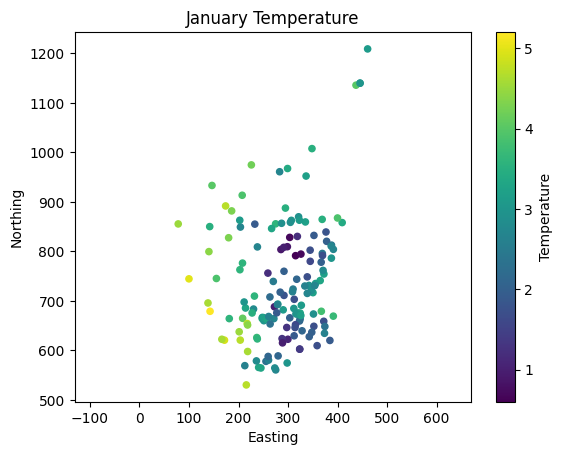

In [21]:
ax = gp.symbol(dat, nameColor="January_temp", label = "Temperatures")
plt.title("January Temperature")
plt.xlabel("Easting")
plt.ylabel("Northing")
plt.axis("equal")
aa = plt.colorbar(ax)
aa.set_label("Temperature")



A more elaborated graphic representation displays the samples with a symbol proportional to the Elevation (**nameSize**) and a color representing the Temperature (**nameColor**).

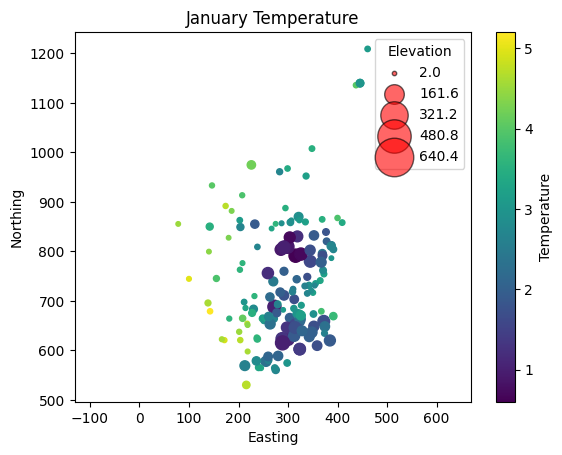

In [22]:
ax = gp.symbol(dat, nameColor="January_temp",nameSize = "Elevation", flagLegendSize = True)
plt.title("January Temperature")
legend = plt.legend()
legend.set_title("Elevation")
plt.xlabel("Easting")
plt.ylabel("Northing")
plt.axis("equal")
aa = plt.colorbar(ax)
aa.set_label("Temperature")

Of course, you can use your own graphical routines (for example, a direct call to **matplotlib**) by simply accessing to the *gstlearn* data base values (using '[ ]' accessor):


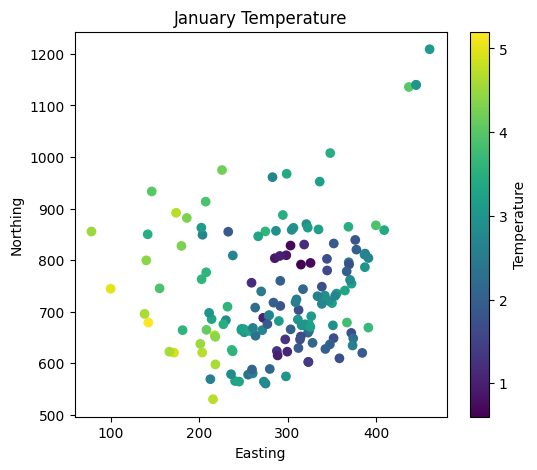

In [23]:
plt.figure(figsize=(6, 5))

# Nuage de points coloré selon la température
sc = plt.scatter(
    dat["x1"],
    dat["x2"],
    c=dat["January_temp"],
    cmap="viridis" ) 

# Colorbar avec titre
cbar = plt.colorbar(sc)
cbar.set_label("Temperature")

# Titres et labels des axes
plt.xlabel("Easting")
plt.ylabel("Northing")
plt.title("January Temperature")

plt.show()

## Grid Data Base

On the same area, a terrain model is available (as a demonstration file available in the package distribution). We first download it and create the corresponding data base defined on a grid support (*DbGrid*).


In [24]:
fileNF = "Scotland_Elevations.NF"

if flagInternetAvailable :
    url = os.path.join("https://soft.minesparis.psl.eu/gstlearn/data/Scotland/",fileNF)
    urllib.request.urlretrieve(url,fileNF)
    grid = gl.DbGrid.createFromNF(fileNF)
grid


Data Base Grid Characteristics

Data Base Summary
-----------------
File is organized as a regular grid
Space dimension              = 2
Number of Columns            = 4
Total number of samples      = 11097
Number of active samples     = 3092

Grid characteristics:
---------------------
Origin :     65.000   535.000
Mesh   :      4.938     4.963
Number :         81       137

Variables
---------
Column = 0 - Name = Longitude - Locator = x1
Column = 1 - Name = Latitude - Locator = x2
Column = 2 - Name = Elevation - Locator = f1
Column = 3 - Name = inshore - Locator = sel

We can check that the grid is constituted of 81 columns and 137 rows, or 11097 grid cells.  We can also notice that some locators are already defined (these information are stored in the Neutral File).


## Selection

We can check the presence of a variable (called `inshore`) which is assigned to the `sel` locator: this corresponds to a *Selection* which acts as a binary filter: some grid cells are active and others are masked off. The count of active samples is given in the previous printout (3092). This selection remains active until it is replaced or deleted (there may not be more than one selection defined at a time per data base). This is what can be seen in the following display where we represent the `Elevation` only within the `inshore` selection.


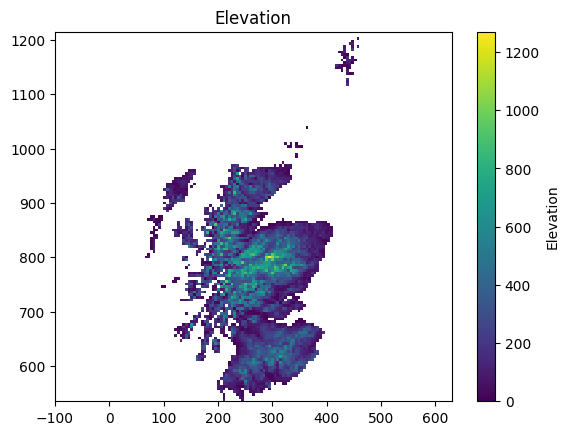

In [25]:
im = gp.raster(grid,name="Elevation", label = "Elevation")
plt.axis("equal")
aa = plt.colorbar(im)
aa.set_label("Elevation")


Note that any variable can be considered as a Selection: it must simply be assigned to the `sel` locator using the `setLocator` variable described earlier.



## Final plot

On this final plot, we combine grid and point representations.


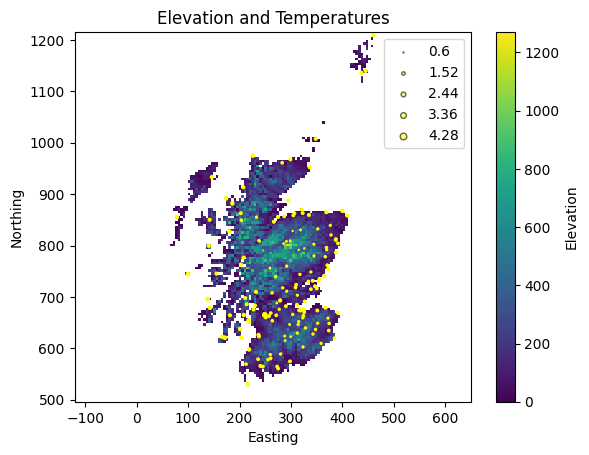

In [26]:
fig, ax = plt.subplots()
im = ax.raster(grid,name="Elevation", label = "Elevation")
aa = plt.colorbar(im)
aa.set_label("Elevation")
sy = ax.symbol(dat,nameSize = "*temp", c = "yellow", flagLegendSize = True, sizmin = 0.5, sizmax = 6 )
plt.xlabel("Easting")
plt.ylabel("Northing")
plt.title("Elevation and Temperatures")
aa = plt.axis("equal")